In [263]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

In [197]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [14]:
#Configuring GPU

In [198]:
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [15]:
#Set GPU to VRAM

In [199]:
train_data = tf.keras.utils.image_dataset_from_directory(r'C:\Users\Bobolorba\Desktop\Projetos\Image_processing\Keras_classifier\Classes\train')
test_data = tf.keras.utils.image_dataset_from_directory(r'C:\Users\Bobolorba\Desktop\Projetos\Image_processing\Keras_classifier\Classes\test')
val_data = tf.keras.utils.image_dataset_from_directory(r'C:\Users\Bobolorba\Desktop\Projetos\Image_processing\Keras_classifier\Classes\val')

Found 1980 files belonging to 2 classes.
Found 949 files belonging to 2 classes.
Found 335 files belonging to 2 classes.


In [2]:
#Data Pipeline from directory

In [200]:
train_data = train_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))
val_data = val_data.map(lambda x,y:(x/255,y))

In [266]:
#Turning data into values between 0 and 1 with a lambda function

In [202]:
train_scaled_iterator = train_data.as_numpy_iterator()
test_scaled_iterator = test_data.as_numpy_iterator()
val_scaled_iterator = val_data.as_numpy_iterator()

In [203]:
train_batch = train_scaled_iterator.next()
test_batch = test_scaled_iterator.next()
val_batch = val_scaled_iterator.next()

In [ ]:
#Turning data into 

In [204]:
len(train_data)

62

In [205]:
model_final = Sequential()

In [206]:
model_final.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model_final.add(MaxPooling2D())
model_final.add(Conv2D(32, (3,3), 1, activation='relu'))
model_final.add(MaxPooling2D())
model_final.add(Conv2D(16, (3,3), 1, activation='relu'))
model_final.add(MaxPooling2D())
model_final.add(Flatten())
model_final.add(Dense(256, activation='relu'))
model_final.add(Dense(1, activation='sigmoid'))

In [207]:
model_final.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [270]:
#Configuring the classifier utilizing adam as optimizer and Binary Cross Entropy as loss

In [208]:
model_final.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 30, 30, 16)     

In [209]:
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    min_lr=0.0001
)

In [191]:
#Callback function to decrease loss/increase accuracy through changing learning rates

In [210]:
hist = model_final.fit(train_data, epochs=24, validation_data=val_data, callbacks=[lr_callback])

Epoch 1/24
62/62 [==============================] - 10s 101ms/step - loss: 0.5054 - accuracy: 0.7924 - val_loss: 0.3511 - val_accuracy: 0.8030 - lr: 0.0010
Epoch 2/24
62/62 [==============================] - 5s 75ms/step - loss: 0.2453 - accuracy: 0.8641 - val_loss: 0.1087 - val_accuracy: 0.9493 - lr: 0.0010
Epoch 3/24
62/62 [==============================] - 5s 76ms/step - loss: 0.1168 - accuracy: 0.9586 - val_loss: 0.0485 - val_accuracy: 0.9851 - lr: 0.0010
Epoch 4/24
62/62 [==============================] - 5s 76ms/step - loss: 0.0800 - accuracy: 0.9763 - val_loss: 0.0575 - val_accuracy: 0.9791 - lr: 0.0010
Epoch 5/24
62/62 [==============================] - 5s 70ms/step - loss: 0.0320 - accuracy: 0.9919 - val_loss: 0.1012 - val_accuracy: 0.9672 - lr: 0.0010
Epoch 6/24
62/62 [==============================] - 5s 73ms/step - loss: 0.0513 - accuracy: 0.9803 - val_loss: 0.0574 - val_accuracy: 0.9821 - lr: 0.0010
Epoch 7/24
62/62 [==============================] - 5s 72ms/step - loss: 0

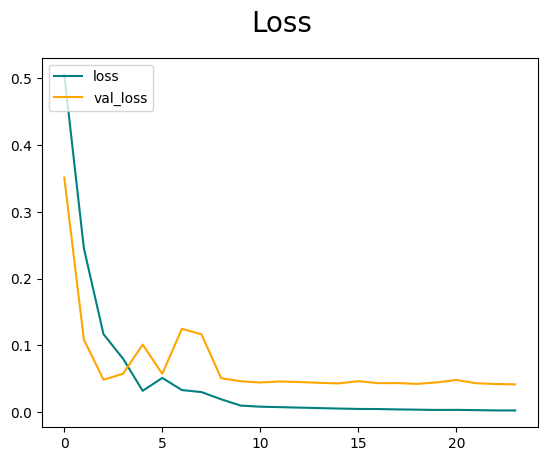

In [211]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

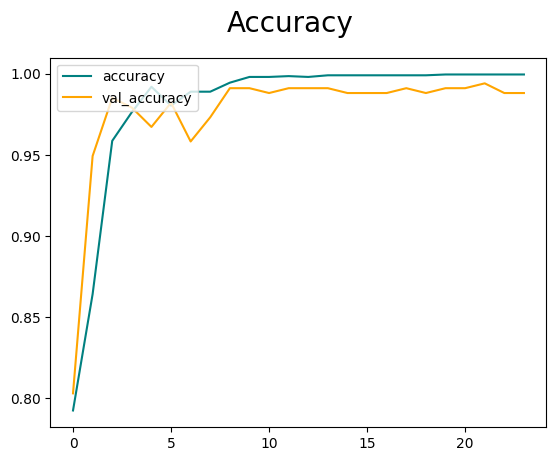

In [212]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
#After around 10 epochs accuracies and losses stabilized

In [213]:
precision = Precision()
recall = Recall()
binaryAccuracy = BinaryAccuracy()

In [214]:
for batch in test_data.as_numpy_iterator(): 
    X, y = batch
    yhat = model_5.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    binaryAccuracy.update_state(y, yhat)

1/1 [==============================] - 0s 373ms/step


In [215]:
print(precision.result(), recall.result(), binaryAccuracy.result())

tf.Tensor(0.9945946, shape=(), dtype=float32) tf.Tensor(0.98395723, shape=(), dtype=float32) tf.Tensor(0.99578506, shape=(), dtype=float32)


In [272]:
#Results within 5% deviation

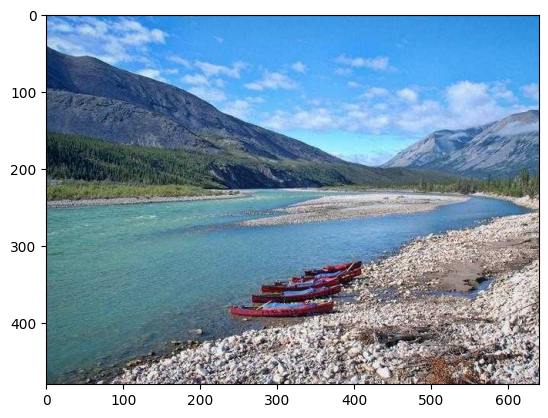

In [255]:
img_bgr = cv2.imread(r'C:\Users\Bobolorba\Desktop\Projetos\Image_processing\Keras_classifier\Classes\test\river\B77HUEPZYNFL.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

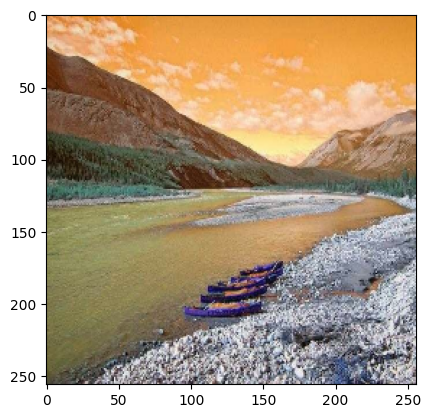

In [256]:
resized_img = tf.image.resize(img_bgr, (256,256))
plt.imshow(resized_img.numpy().astype(int))

In [257]:
yhat = model.predict(np.expand_dims(resized_img/255, 0))

1/1 [==============================] - 0s 35ms/step


In [260]:
# results closer to 0 are classified as Forest and closer to 1 are classified as Rivers

In [261]:
yhat

array([[0.9999999]], dtype=float32)

In [262]:
if yhat < 0.5: 
    print(f'Predicted class is Forest')
else:
    print(f'Predicted class is River')

Predicted class is River


In [264]:
model.save(os.path.join('models','imageclassifier.h5'))